<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/TestePratico1_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
tf.__version__

'2.2.0-rc1'

In [0]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/dudu.jpg', target_size=(224,224))

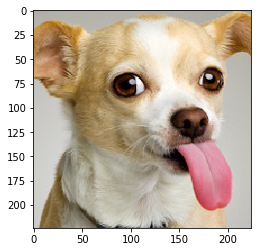

In [3]:
plt.imshow(sample_image)

In [11]:
plt.imshow(sample_image.reshape(28,28), cmap='gray')

ValueError: ignored

In [5]:
type(sample_image)

PIL.Image.Image

In [0]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [7]:
type(sample_image)

numpy.ndarray

In [10]:
np.shape(sample_image)

(224, 224, 3)